# Apple Inc. Financial Analysis Report (2023)

**Group 6 Members:** 

Keying Wang W0844851

Tran Bao Diem Phuong  W0860472

Pawan Kumar W0844851

---

## Report Overview

This report presents a comprehensive financial analysis of Apple Inc. based on its 2023 fiscal data. The analysis includes:

- Financial ratio evaluations  
- Stock valuation using the CAPM model  
- Monte Carlo simulations for future stock prices  
- A comparative analysis of intrinsic value per share across different WACC scenarios

The aim is to assess Apple's profitability, liquidity, growth potential, and investment attractiveness from a financial analyst’s perspective.


In [7]:
import yfinance as yf

In [8]:
# 📦 Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
# 📥 Download data (Close prices)
start_date = '2023-03-31'
end_date = '2024-03-31'

apple_df = yf.download('AAPL', start=start_date, end=end_date)
sp500_df = yf.download('^GSPC', start=start_date, end=end_date)

apple_close = apple_df['Close']
sp500_close = sp500_df['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 1. Apple Stock Price Trend


This chart shows AAPL closing price over the past year, used to observe market performance and compare with intrinsic value estimates.


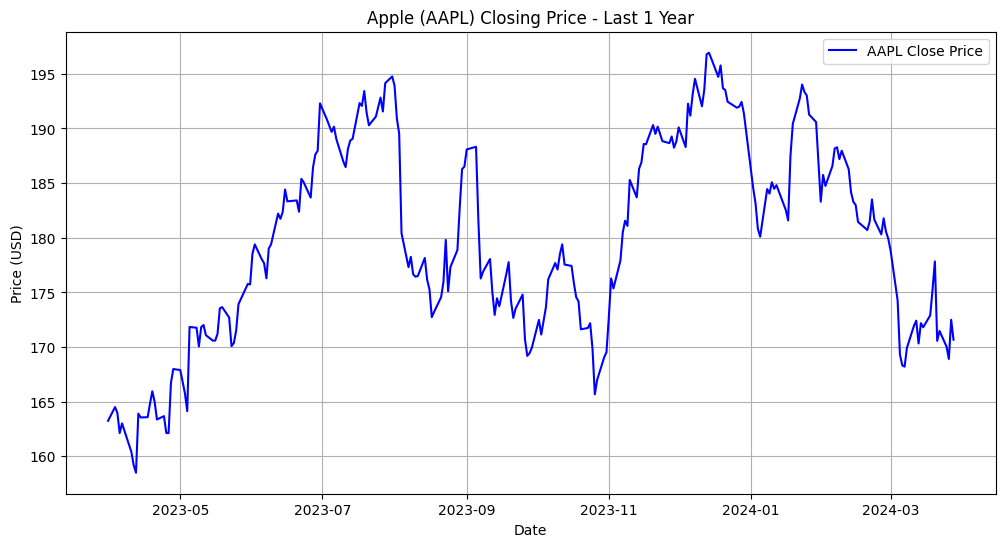

In [10]:
plt.figure(figsize=(12,6))
plt.plot(apple_close, label='AAPL Close Price', color='blue')
plt.title('Apple (AAPL) Closing Price - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

## 2. Monte Carlo Simulation - 100 Simulations for Next 30 Days

This part applies **Monte Carlo simulation** to estimate the possible future paths of Apple (AAPL) stock price over the next **30 trading days**.

- The simulation is based on **historical daily returns**, using the mean (`mu`) and standard deviation (`sigma`) of Apple’s stock returns.
- A total of **100 simulations** are generated to reflect the potential variability in price movement under a random walk model.
- This helps visualize a range of possible outcomes, reflecting **market volatility and uncertainty**, useful for **risk analysis** and **portfolio planning**.


C:\Users\keyin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\Users\keyin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


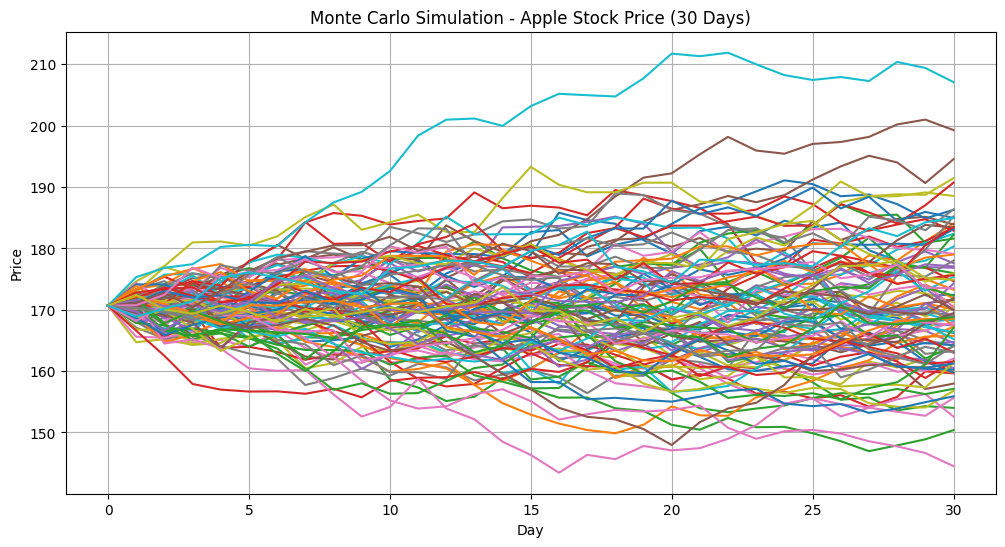

In [11]:
days = 30
simulations = 100
last_price = apple_close.iloc[-1]
returns = apple_close.pct_change().dropna()
mu = returns.mean()
sigma = returns.std()

simulations_dict = {}
for i in range(simulations):
    prices = [last_price]
    for _ in range(days):
        shock = np.random.normal(loc=mu, scale=sigma)
        prices.append(prices[-1] * (1 + shock))
    simulations_dict[i] = prices

simulation_df = pd.DataFrame(simulations_dict)

plt.figure(figsize=(12,6))
plt.plot(simulation_df)
plt.title('Monte Carlo Simulation - Apple Stock Price (30 Days)')
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## 3. CAPM and Beta Calculation  – Apple vs. S&P 500

In this part, we calculate **Apple’s Beta** using the **Capital Asset Pricing Model (CAPM)** framework.

- Beta is derived via **linear regression** of Apple’s daily returns against the **S&P 500 index returns**.
- AAPL’s Beta measures its **systematic risk** relative to the overall market.
- The resulting Beta value indicates how sensitive Apple’s stock is to market movements:
  - **Beta > 1** → More volatile than the market
  - **Beta < 1** → Less volatile

> In this case, the calculated **Beta ≈ 1.0631**, implying Apple’s price moves roughly in line with the market, but slightly more reactive.


In [12]:
aapl_returns = apple_close.pct_change().dropna()
sp500_returns = sp500_close.pct_change().dropna()

df = pd.concat([aapl_returns, sp500_returns], axis=1)
df.columns = ['AAPL_Returns', 'SP500_Returns']
df.dropna(inplace=True)

slope, intercept, r_value, p_value, std_err = linregress(df['SP500_Returns'], df['AAPL_Returns'])
beta = slope
print(f"Beta = {beta:.4f}")

Beta = 1.0631


### Beta Visualization via Regression Plot

The scatter plot below visualizes the relationship between Apple’s returns and the S&P 500’s returns. The red line represents the **regression line**, whose slope equals **Apple’s Beta**.

- Each point represents a pair of daily returns (AAPL vs. SP500).
- A clear positive slope indicates that Apple’s returns are positively correlated with the market.
- The regression line provides a visual confirmation of the Beta value computed earlier.

> This regression plot supports the **CAPM-based risk assessment** and enhances the understanding of Apple's market sensitivity.


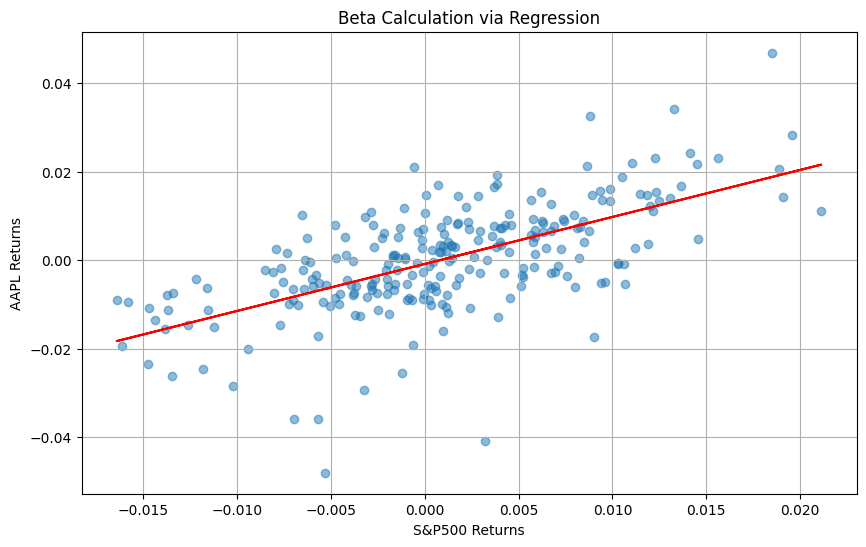

In [13]:
# Regression Plot
plt.figure(figsize=(10,6))
plt.scatter(df['SP500_Returns'], df['AAPL_Returns'], alpha=0.5)
plt.plot(df['SP500_Returns'], intercept + beta * df['SP500_Returns'], color='red')
plt.title('Beta Calculation via Regression')
plt.xlabel('S&P500 Returns')
plt.ylabel('AAPL Returns')
plt.grid(True)
plt.show()

### CAPM-Based Cost of Equity (ROE)

Using the CAPM model, we calculate Apple’s **cost of equity** based on data from the *Apple 2023 Annual Report* Excel file:

- Risk-free rate = 3.5% (10Y Treasury)
- Market return = 10% (S&P500 10-year average)
- Beta ≈ 1.06 (calculated from historical regression of AAPL vs. S&P 500 returns)

The result (10.41%) represents the **expected return required by equity investors**, and is used to estimate the cost of equity in valuation models such as WACC or DCF.


In [14]:
# Calculate ROE using CAPM
risk_free_rate = 0.035
market_return = 0.10
roe_capm = risk_free_rate + beta * (market_return - risk_free_rate)
print(f"ROE using CAPM = {roe_capm:.2%}")

ROE using CAPM = 10.41%


### WACC Sensitivity Analysis – Intrinsic Value per Share

This table shows how Apple’s **intrinsic value per share** changes under different WACC assumptions (6%–12%).

Firm value and shares outstanding are based on data from the "Apple 2023 Annual Report" Excel sheet

Free Cash Flow (FCF) = 99,884 million USD

Shares Outstanding = 15,704 million shares

- Firm Value = Free Cash Flow / WACC
- Value per Share = Firm Value / Shares Outstanding

It helps evaluate how sensitive the valuation is to changes in WACC.

In [15]:
# Define WACC range (from 6% to 12%)
wacc_range = np.linspace(0.06, 0.12, 50)

firm_value = 99884
shares_outstanding = 15704

# Calculate estimated firm value and value per share at each WACC level
values = firm_value / wacc_range
per_share = values / shares_outstanding

# Create a well-formatted DataFrame for output
valuation_df = pd.DataFrame({
    'WACC (%)': (wacc_range * 100).round(2),
    'Value per Share ($)': per_share.round(2)
})

# Print the first 10 rows as a preview (can be removed to show the full table)
print(valuation_df.head(10))


   WACC (%)  Value per Share ($)
0      6.00               106.01
1      6.12               103.89
2      6.24               101.85
3      6.37                99.89
4      6.49                98.01
5      6.61                96.19
6      6.73                94.44
7      6.86                92.76
8      6.98                91.13
9      7.10                89.56


### Intrinsic Value vs. WACC (Chart)

This plot visualizes the inverse relationship between **WACC** and **intrinsic value per share**.

- As WACC increases, the estimated value per share decreases.
- Shows the impact of discount rate changes on valuation outcomes.

This chart makes it easier to interpret the sensitivity table visually.


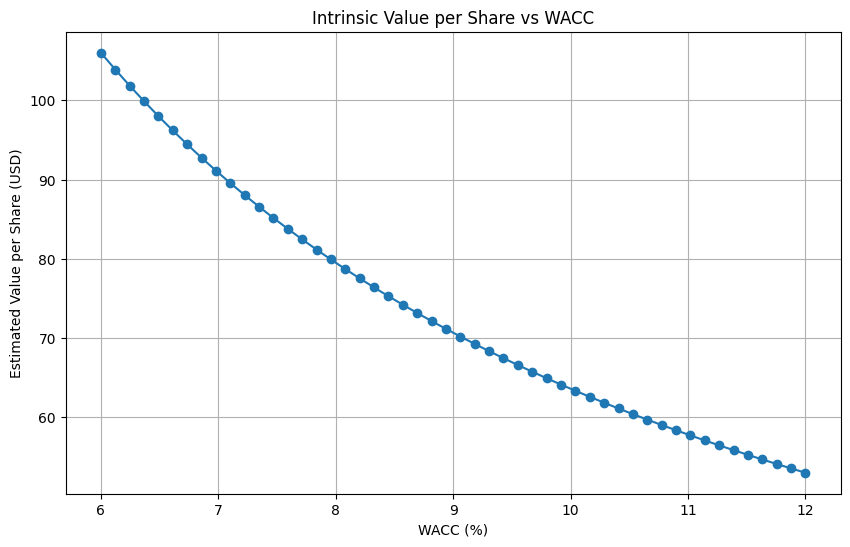

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(wacc_range * 100, per_share, marker='o')
plt.title("Intrinsic Value per Share vs WACC")
plt.xlabel("WACC (%)")
plt.ylabel("Estimated Value per Share (USD)")
plt.grid(True)
plt.show()



### FB Prophet Forecast – Apple Stock (Next 30 Days)

We used **Facebook Prophet**, a time-series forecasting model developed by Meta, to predict Apple's stock price for the next 30 trading days.

**Key points:**
- The model uses historical closing prices and captures seasonality and trends automatically.
- The shaded area represents the 95% confidence interval for future predictions.
- The overall forecast shows a relatively **stable price trend**, with minor fluctuations, supporting the results from our Monte Carlo simulation.

> Prophet is especially useful for time-series data with strong seasonal effects, although for stock prices (which are noisy), the results should be interpreted with caution.


In [ ]:
!pip install prophet

01:52:45 - cmdstanpy - INFO - Chain [1] start processing
01:52:45 - cmdstanpy - INFO - Chain [1] done processing


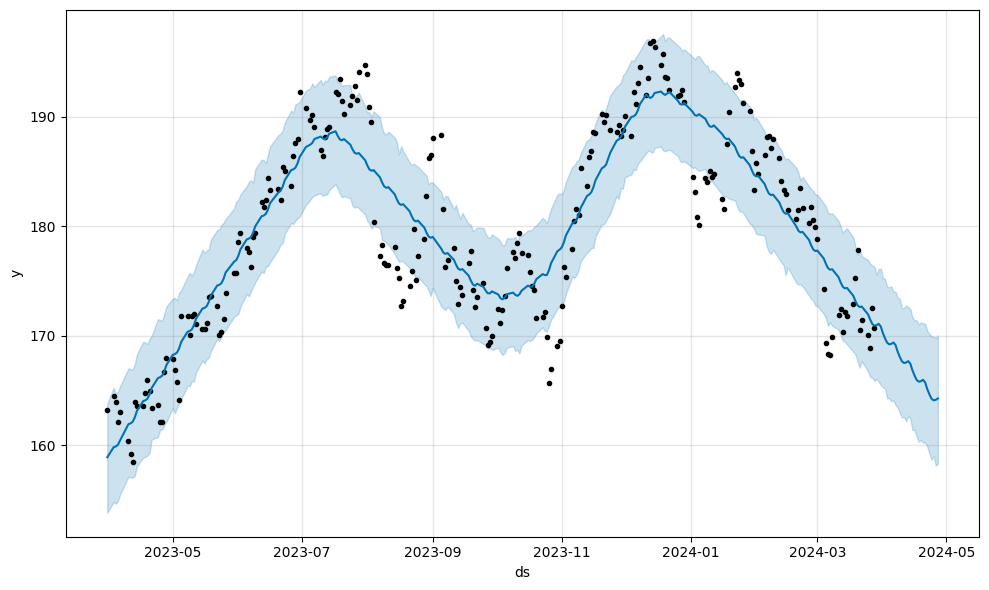

In [19]:
from prophet import Prophet
import pandas as pd

# Prepare data: rename columns for Prophet format (ds: date, y: value)
df_prophet = apple_close.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet requires these specific column names

# Create and fit the model
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Forecast next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast);
